In [339]:
import pandas as pd # used to access the values present in our data
import numpy as np # Used to access the numerical values
import matplotlib.pyplot as plt #This library used for the visualisation data in graphical form
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from statistics import mean
import statistics

In [327]:
df=pd.read_csv('crime.csv')
df

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district
0,2001,161,100,92,646,3268,4267,ADILABAD
1,2001,276,46,106,947,3101,4476,ANANTAPUR
2,2001,158,54,118,1701,4344,6375,CHITTOOR
3,2001,133,40,50,449,2614,3286,CUDDAPAH
4,2001,149,46,98,2508,4523,7324,EAST GODAVARI
...,...,...,...,...,...,...,...,...
8592,2012,1,0,0,0,107,108,STF
8593,2012,89,158,908,4948,2143,8246,WEST
8594,2012,0,0,0,17,153,170,LAKSHADWEEP
8595,2012,11,12,4,187,746,960,KARAIKAL


In [328]:
print(df.isnull().sum())

year            0
murder          0
rape            0
kidnap          0
robbery         0
other_crimes    0
total_crimes    0
district        0
dtype: int64


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          8597 non-null   int64 
 1   murder        8597 non-null   int64 
 2   rape          8597 non-null   int64 
 3   kidnap        8597 non-null   int64 
 4   robbery       8597 non-null   int64 
 5   other_crimes  8597 non-null   int64 
 6   total_crimes  8597 non-null   int64 
 7   district      8597 non-null   object
dtypes: int64(7), object(1)
memory usage: 537.4+ KB


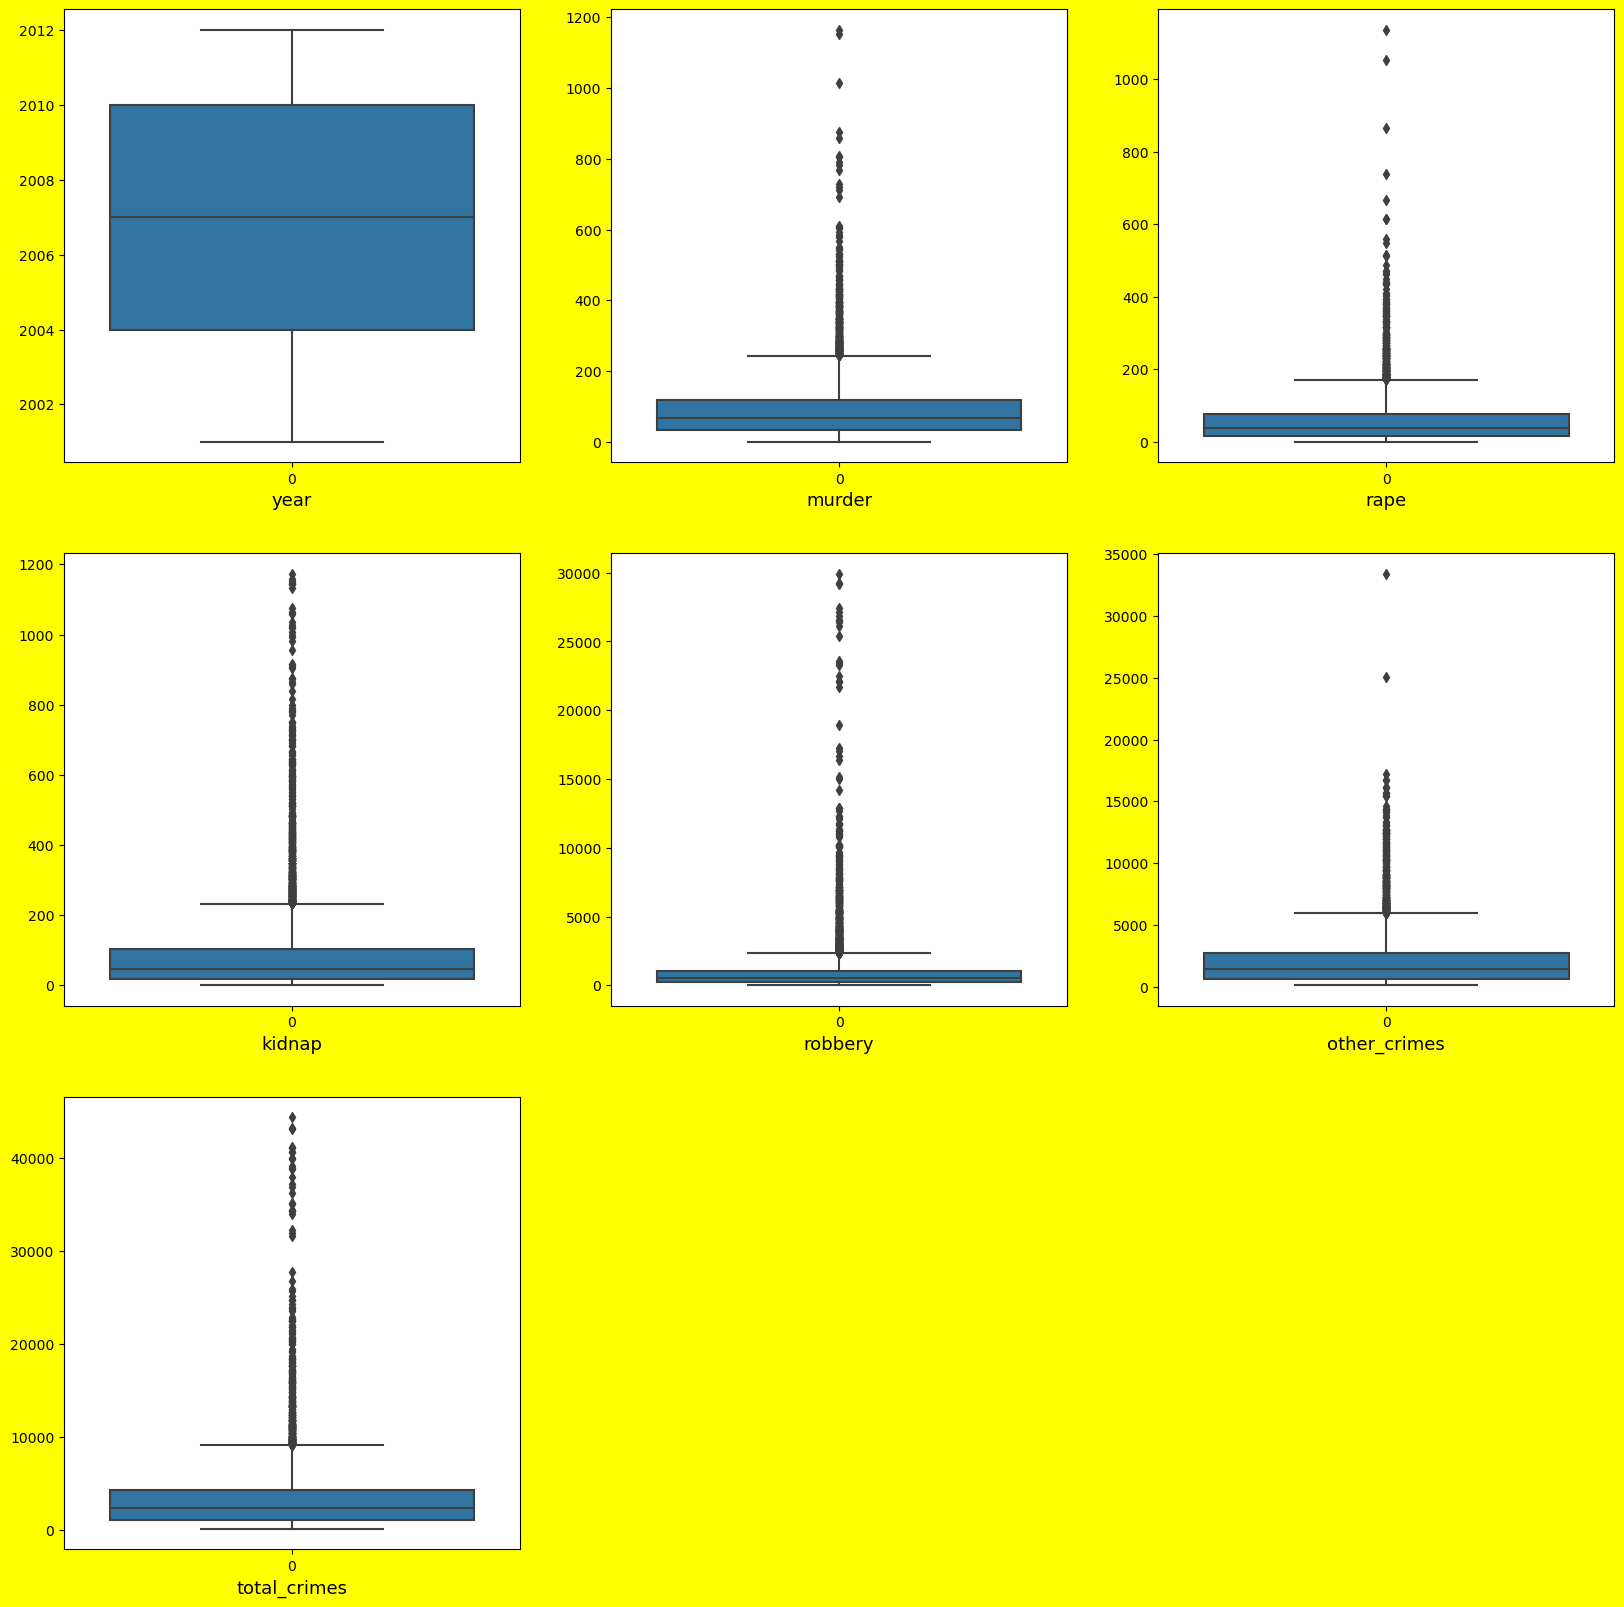

In [333]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <=7 :
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=13)
        
    plotnumber+=1
plt.show()

In [347]:
#find the IQR - Inter quartile range to identify the outliers
q1= df.quantile(0.25)
q2= df.quantile(0.50)
q3= df.quantile(0.75)

iqr = q3 - q1

In [349]:
#Validating outlier
rape_high = (q3.rape + (1.5 * iqr.rape))
rape_high

#Indxes which have higher values
np_index = np.where(df['rape']> rape_high)
print(np_index)

#dropping the indexes
df = df.drop(df.index[np_index])
df.shape

#resetting the indexes
df.reset_index()

171.0

In [310]:
#Indxes which have higher values
np_index = np.where(df['crimes']> crimes_high)
np_index

(array([], dtype=int64),)

In [311]:
#dropping the indexes
df = df.drop(df.index[np_index])
df.shape

(8228, 3)

In [312]:
#it shows how many data points we have deleted
index

(array([  3,  25,  38,  60,  73,  95, 108, 130, 165, 200, 235, 270, 305,
        340, 375, 410], dtype=int64),)

In [313]:
#resetting the indexes
df.reset_index()

,index,year,crimes,district
0,0,2001,4154,Adilabad
1,1,2001,4125,Anantapur
2,2,2001,5818,Chittoor
3,3,2001,3140,Cuddapah
4,4,2001,6507,East Godavari
...,...,...,...,...
8223,8592,2012,6,Stf
8224,8593,2012,5558,West
8225,8594,2012,60,Lakshadweep
8226,8595,2012,787,Karaikal


<Axes: xlabel='crimes', ylabel='Density'>

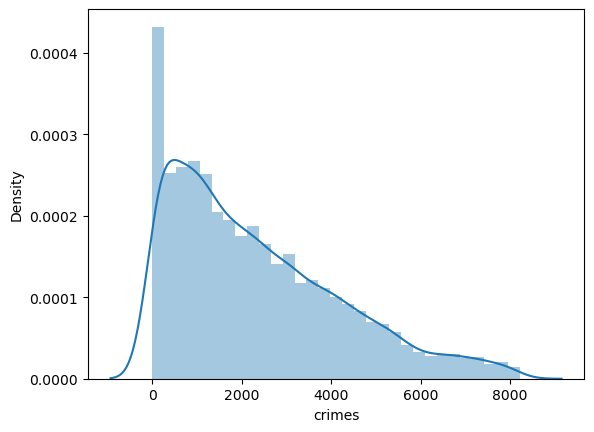

In [314]:
sns.distplot(df['crimes'])

In [ ]:
#dataset
#X =dataset[['YEAR','MURDER','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','RAPE','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','OTHER IPC CRIMES','TOTAL IPC CRIMES']]
#X.head()

In [315]:
#dataset
X =df[['year','crimes']]
X.head()

,year,crimes
0,2001,4154
1,2001,4125
2,2001,5818
3,2001,3140
4,2001,6507


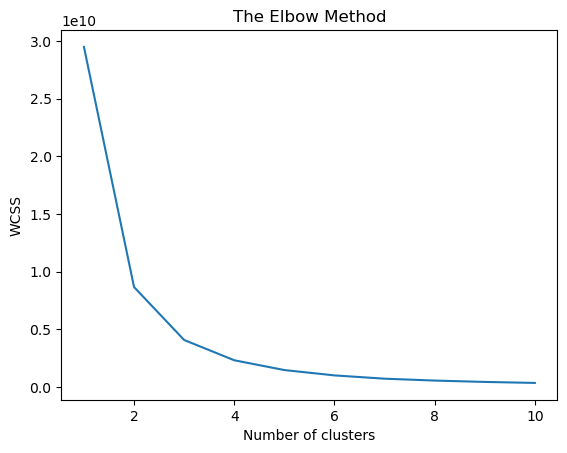

In [272]:
#Elbow method
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [316]:
X.head()

,year,crimes
0,2001,4154
1,2001,4125
2,2001,5818
3,2001,3140
4,2001,6507


In [317]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 2 1 ... 0 0 2]


# Model Evaluation

In [275]:
# Just like in supervised learning we have a metric in unsupervised learning as well
from sklearn.metrics import silhouette_score

In [318]:
silhouette_score(X,y_kmeans)

0.5921077213075208

# Sample prediction

### It predicts the cluster number to which the datapoint belongs to. 

In [319]:
test=kmeans.predict(np.array([[2001,5818]]))
test[0]

1

# 1. Sensitive areas belongs to cluster_1_states

In [ ]:
Observations why Sensitive:
    
    1. West Godavari being the most sensitive district in INDIA for crimes
    2. Considered the most number of crimes in the other IPC crimes 
    3. In order to stop the crimes, we need to increase the number of courts and judges to reduce the backlog of cases.
    4. Need to implement measures to improve witness protection and enhance the efficiency of the criminal justice system.
    5. Crime prevention awareness programs is critical to maintain law and order in the country.
    6. Here are the top 20 stratergies that can be implemented to help reduce the crimes -- 
        1. Help Victims of Crime
        2. Reduce Demand for Law Enforcement
        3. Fixing Distressed Spaces
        4. Making Crime Attractors Less Appealing 
        5. Scientific Supports for Law Enforcement 
        6. Improving the Job Market and Job Training
        7. Facilitate Neighborhood Non-Profits
        8. Make Jails and Prison Less Criminogenic
        9. Better Prepare People to Return Home from Prison
        10. Fund Community-Based Violence Interruption
        11. Use Technology to Reduce Violence
        12. Tackle the Causes and Consequences of Poverty
        13. Fix Long-Standing Problems 
        14. Shorten the Reach of the Criminal Justice System
        15. Help Those with Substance-Use Disorders 
        16. Support Programs for High-Risk Young People and Families
        17. Education - Improving education is its own crime-reducing category, but schools can facilitate crime reduction outside of schools. Reducing food insecurity, humanizing discipline and improving the safety of the school commute benefit everyone. 
        18. Housing - Like education, housing is its own category beyond the scope of this essay. But there are housing solutions with specific crime-reducing benefits: permanent, supportive housing; transitional housing for young people leaving homelessness; and housing programs specifically for people who cycle through emergency services. 
        19. Policy and Law - There are any number of laws and regulations that could be tweaked to meaningfully reduce crime and victimization. For example, higher taxes that specifically target the overuse of criminogenic products like guns and alcohol have been shown to reduce excess demand. 
        20. Stop the Proliferation of Firearms -the more guns, the more crime.
    
    https://www.vitalcitynyc.org/articles/twenty-strategies-for-reducing-crime-in-cities
    

In [320]:
cluster_1_states= df[y_kmeans==1]
cluster_1_states.sort_values(by='crimes')

,year,crimes,district
6689,2010,4357,Shivpuri
3789,2006,4357,Rajgarh
8384,2012,4358,Jhunjhunu
2383,2004,4367,Khargon
7229,2011,4368,Mehsana
...,...,...,...
3743,2006,8186,Kottayam
4499,2007,8194,Sagar
4652,2007,8199,Alwar
3007,2005,8200,Bangalore Rural


# 2. Peaceful Area's belongs to the cluster_0_states

Observations why it's the most peaceful area: 
1. S.T.F., GRP, CId are bieng the most peaceful districts in India where almost very less number of crimes have happened
2. Most underrated place resulted in less people gatherings
3. Less crime prone areas as compared to the areas where the population is higher, less roberry prone areas etc.

In [321]:
cluster_0_states= df[y_kmeans==0]
cluster_0_states.sort_values(by='crimes')

,year,crimes,district
1358,2002,0,S.T.F.
675,2001,0,S.T.F.
1554,2003,1,G.R.P.
6005,2009,1,Cid
7272,2011,2,Cid
...,...,...,...
7398,2011,1914,Barwani
3354,2005,1914,Hardoi
8467,2012,1914,Bhim Nagar
925,2002,1915,Bagalkot


# 3. Moderate Area's belongs to the cluster_2_states

Observations why Moderate: 

    1. It seems like Unnao,Giridih,Etawah,Kutch (West-Bhuj),Purnea are the moderate crime districts
    2. Low highly offensive crimes 

In [322]:
cluster_2_states= df[y_kmeans==2]
cluster_2_states.sort_values(by='crimes')

,year,crimes,district
2692,2004,1917,Unnao
227,2001,1918,Giridih
6951,2010,1918,Etawah
7228,2011,1919,Kutch (West-Bhuj)
1469,2003,1919,Purnea
...,...,...,...
580,2001,4352,G.R.P.
113,2001,4353,Bilaspur
5226,2008,4353,Vidisha
2408,2004,4354,Akola


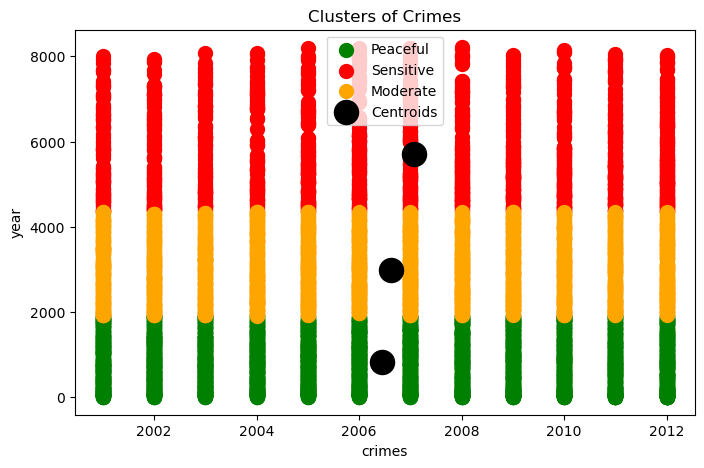

In [326]:
# Visualising the clusters
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0]['year'], X[y_kmeans == 0]['crimes'], s = 100, c = 'green', label = 'Peaceful')

plt.scatter(X[y_kmeans == 1]['year'], X[y_kmeans == 1]['crimes'], s = 100, c = 'red', label = 'Sensitive')

plt.scatter(X[y_kmeans == 2]['year'], X[y_kmeans == 2]['crimes'], s = 100, c = 'orange', label = 'Moderate')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of Crimes')
plt.xlabel('crimes')
plt.ylabel('year')
plt.legend()
plt.show()